# Prédiction de l'addiction aux drogues chez les étudiants

Ce projet vise à développer un modèle de machine learning pour prédire l'addiction aux drogues chez les étudiants en utilisant divers algorithmes de classification. Le notebook contient les étapes de préparation des données, de modélisation et d'évaluation.

## Table des matières

1. [Introduction](##introduction)
2. [Importer les bibliothèques nécessaires](##importer-les-bibliothèques-nécessaires)
3. [Charger et explorer les données](##charger-et-explorer-les-données)
4. [Prétraiter les données](##prétraiter-les-données)
5. [Exploration des données](##exploration-des-données)
6. [Modélisation](##modélisation)
7. [Évaluation finale avec le dataset de test](##évaluation-finale-avec-le-dataset-de-test)
8. [Conclusion](##conclusion)
9. [Auteur](##auteur)
10. [License](##license)

## Introduction

L'addiction aux drogues est un problème sérieux qui affecte de nombreux étudiants à travers le monde. L'objectif de ce projet est de créer un modèle de machine learning capable de prédire si un étudiant est susceptible d'être accro aux drogues en fonction de divers facteurs. Cela pourrait aider à identifier les étudiants à risque et à prendre des mesures préventives.

## Importer les bibliothèques nécessaires

Dans cette section, nous importons les bibliothèques nécessaires pour notre analyse. Nous utilisons `pandas` pour la manipulation des données, `numpy` pour les opérations numériques, et `miceforest` pour l'imputation des données manquantes. Ces bibliothèques nous permettront de charger, traiter et analyser nos données de manière efficace.


In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install miceforest


## Charger et explorer les données
Nous chargeons les datasets d'entraînement et de test à partir des fichiers CSV. Ensuite, nous affichons les premières lignes et la forme des datasets pour avoir une vue d'ensemble des données avec lesquelles nous travaillons. Cela nous permet de comprendre la structure et les dimensions des données.

In [18]:
import pandas as pd


# Charger les datasets
train = pd.read_csv("Student_addiction_dataset_train.csv")
test = pd.read_csv("student_addiction_dataset_test.csv")

# Afficher les premières lignes des datasets
print(train.head())

# Afficher la forme des datasets
print(train.shape)


  Experimentation Academic_Performance_Decline Social_Isolation  \
0             Yes                           No               No   
1              No                          Yes              NaN   
2              No                           No               No   
3             Yes                           No              Yes   
4             Yes                          Yes               No   

  Financial_Issues Physical_Mental_Health_Problems Legal_Consequences  \
0              Yes                              No                 No   
1              Yes                             Yes                Yes   
2               No                              No                Yes   
3              Yes                              No                Yes   
4              NaN                              No                Yes   

  Relationship_Strain Risk_Taking_Behavior Withdrawal_Symptoms  \
0                  No                  Yes                  No   
1                 Yes     

In [19]:
# afficher les types de données 
train_infos = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [20]:
# vérifier s'il y'a des valeurs manquantes :
train.isnull().sum()
test.isnull().sum()




Experimentation                       645
Academic_Performance_Decline          685
Social_Isolation                      677
Financial_Issues                      620
Physical_Mental_Health_Problems       665
Legal_Consequences                    686
Relationship_Strain                   632
Risk_Taking_Behavior                  613
Withdrawal_Symptoms                   653
Denial_and_Resistance_to_Treatment    654
Addiction_Class                         0
dtype: int64

In [21]:
test.describe()
train.describe()



,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,47780,47844,47792,47805,47888,47766,47799,47765,47730,47889,50342
unique,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No
freq,24017,23955,23898,23993,23986,23915,24010,23938,24058,24071,35270


## Prétraiter les données
Dans cette section, nous remplaçons les valeurs 'Yes' par 1 et 'No' par 0 pour convertir les données catégorielles en numériques. Ensuite, nous utilisons une méthode d'imputation itérative pour remplir les valeurs manquantes dans notre dataset d'entraînement. Cela permet de s'assurer que notre modèle de machine learning peut être entraîné de manière efficace sans être affecté par les valeurs manquantes.


In [22]:
# Remplacer les valeurs 'Yes' par 1 et 'No' par 0 dans le dataframe
train.replace({"Yes": 1, "No": 0}, inplace=True)
# Afficher les premières lignes du dataframe après remplacement
train.head()


C:\Users\kamts\AppData\Local\Temp\ipykernel_8544\4010049046.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({"Yes": 1, "No": 0}, inplace=True)


,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [25]:
# Création d'une instance de la classe LinearRegression
lr = LinearRegression()

# Création d'une instance de la classe IterativeImputer en utilisant LinearRegression comme estimateur
imp = IterativeImputer(estimator=lr)

# Application de l'imputation itérative sur le jeu de données 'train' et stockage du résultat dans 'imputed_data'
imputed_data = imp.fit_transform(train)

# Affichage des données imputées
imputed_data


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.49882739, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
# Création d'un DataFrame à partir des données imputées avec les noms de colonnes correspondants au DataFrame 'train'
df = pd.DataFrame(imputed_data, columns=train.columns)
# Affichage des cinq premières lignes du nouveau DataFrame pour vérifier les données
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.498827,1.000000,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.000000,0.500608,0.0,1.0,1.0,1.0,0.0,0.0,1.0


## Exploration des données
Nous explorons les données en affichant des informations générales, en comptant les occurrences de chaque classe et en calculant la matrice de corrélation pour comprendre les relations entre les variables. Une heatmap est également utilisée pour visualiser les corrélations de manière plus intuitive.

In [27]:
# Affichage des informations sur le DataFrame 'train'
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Experimentation                     47780 non-null  float64
 1   Academic_Performance_Decline        47844 non-null  float64
 2   Social_Isolation                    47792 non-null  float64
 3   Financial_Issues                    47805 non-null  float64
 4   Physical_Mental_Health_Problems     47888 non-null  float64
 5   Legal_Consequences                  47766 non-null  float64
 6   Relationship_Strain                 47799 non-null  float64
 7   Risk_Taking_Behavior                47765 non-null  float64
 8   Withdrawal_Symptoms                 47730 non-null  float64
 9   Denial_and_Resistance_to_Treatment  47889 non-null  float64
 10  Addiction_Class                     50342 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 4.

In [28]:
# Compter le nombre d'occurrences de chaque classe d'addiction dans le DataFrame 'train'
train["Addiction_Class"].value_counts()


Addiction_Class
0    35270
1    15072
Name: count, dtype: int64

In [29]:
# Calcul de la matrice de corrélation pour les colonnes numériques du DataFrame 'train'
correlation_matrix = train.corr(numeric_only=True)
# Affichage de la matrice de corrélation
correlation_matrix


,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
Experimentation,1.000000,0.001537,0.005120,-0.004514,0.001911,-0.006176,0.004107,-0.004659,0.001411,0.005223,-0.002880
Academic_Performance_Decline,0.001537,1.000000,0.000639,0.007619,0.001015,0.002093,-0.004434,0.001766,0.000241,-0.003808,0.007085
Social_Isolation,0.005120,0.000639,1.000000,-0.004319,0.007393,-0.003615,-0.002009,0.009816,-0.008878,0.006398,0.007074
Financial_Issues,-0.004514,0.007619,-0.004319,1.000000,0.003926,-0.003061,-0.010371,0.001646,-0.004585,-0.002600,-0.000878
Physical_Mental_Health_Problems,0.001911,0.001015,0.007393,0.003926,1.000000,0.003561,0.002071,-0.005394,-0.003783,-0.005980,0.007802
Legal_Consequences,-0.006176,0.002093,-0.003615,-0.003061,0.003561,1.000000,-0.000418,0.001125,0.001805,-0.008229,0.001928
Relationship_Strain,0.004107,-0.004434,-0.002009,-0.010371,0.002071,-0.000418,1.000000,0.002428,-0.003451,0.001427,0.004324
Risk_Taking_Behavior,-0.004659,0.001766,0.009816,0.001646,-0.005394,0.001125,0.002428,1.000000,0.002722,0.007398,-0.002496
Withdrawal_Symptoms,0.001411,0.000241,-0.008878,-0.004585,-0.003783,0.001805,-0.003451,0.002722,1.000000,0.005951,-0.002726
Denial_and_Resistance_to_Treatment,0.005223,-0.003808,0.006398,-0.002600,-0.005980,-0.008229,0.001427,0.007398,0.005951,1.000000,-0.008836


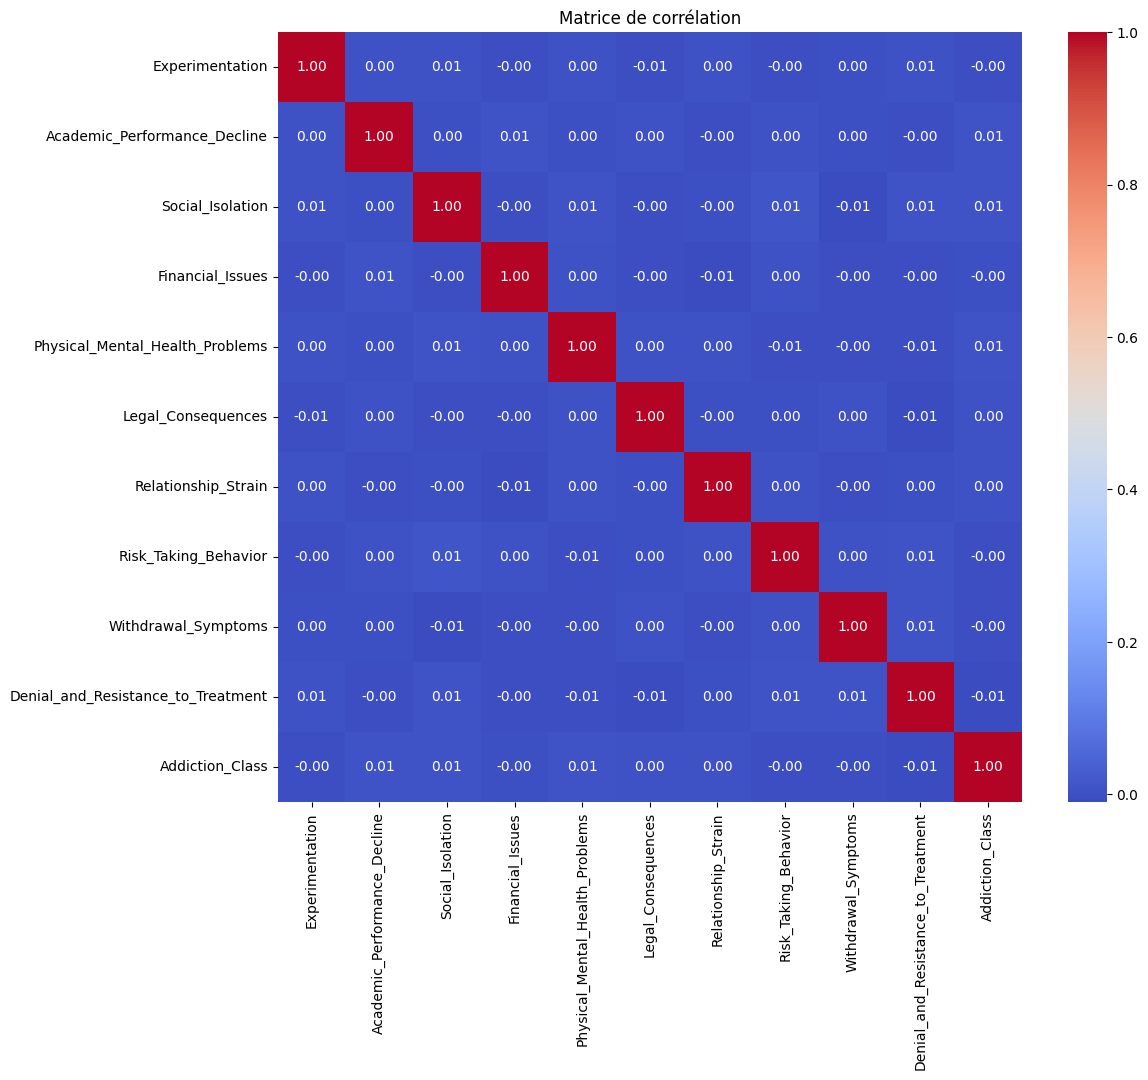

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


## Modélisation
Nous importons divers modèles de classification et des métriques d'évaluation pour entraîner et évaluer notre modèle. La fonction algo_test est utilisée pour tester plusieurs modèles, évaluer leurs performances et déterminer le meilleur modèle basé sur le score F1. Les données sont séparées en caractéristiques (x) et étiquette (y), puis la fonction algo_test est appelée pour entraîner et évaluer les modèles.

In [34]:
import numpy as np

# Importation des classificateurs
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importation des métriques d'évaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Initialisation des classificateurs
g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb = GradientBoostingClassifier()
kn = KNeighborsClassifier()

# Fonction pour tester différents algorithmes de classification
def algo_test(x, y):
    # Liste des modèles à évaluer
    modeller = [g, b, l, d, r, gb, kn]
    # Noms des modèles pour l'affichage des résultats
    isimler = ["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
               "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    # Séparation des données en ensembles d'entraînement et de test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    # Initialisation des listes pour stocker les métriques d'évaluation
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl = []

    # Entraînement et évaluation des modèles
    print("Les données sont prêtes et les modèles sont testés")
    for model in modeller:
        print(model, "le modèle est en cours d'entraînement ...")
        model = model.fit(x_train, y_train)
        tahmin = model.predict(np.array(x_test) if model == kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Entrainement terminé.")
    
    # Création d'un DataFrame pour stocker les métriques d'évaluation
    metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"] = mdl

    # Tri des résultats selon le score F1 et affichage du meilleur modèle
    metrics.sort_values("F1", ascending=False, inplace=True)

    print("Le modèle le plus performant : ", metrics.iloc[0].name)
    model = metrics.iloc[0, -1]
    tahmin = model.predict(np.array(x_test) if model == kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("Classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    # Retour des métriques sans la colonne des modèles
    return metrics.drop("Model", axis=1)


In [35]:
# Séparation des données en caractéristiques (x) et étiquette (y)
# On retire la colonne 'Addiction_Class' pour les caractéristiques car c'est ce que nous cherchons à prédire
x = df.drop("Addiction_Class", axis=1)
# La colonne 'Addiction_Class' devient l'étiquette
y = df[["Addiction_Class"]]
# Affichage des dimensions des caractéristiques et étiquettes pour vérification
x.shape, y.shape

((50342, 10), (50342, 1))

In [36]:
# Appel de la fonction algo_test avec les caractéristiques (x) et l'étiquette (y) comme arguments
algo_test(x, y)


Les données sont prêtes et les modèles sont testés
GaussianNB() le modèle est en cours d'entraînement ...
[[10575     0]
 [ 4528     0]]
BernoulliNB() le modèle est en cours d'entraînement ...


c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[10575     0]
 [ 4528     0]]
LogisticRegression() le modèle est en cours d'entraînement ...
[[10575     0]
 [ 4528     0]]
DecisionTreeClassifier() le modèle est en cours d'entraînement ...
[[10058   517]
 [ 3211  1317]]
RandomForestClassifier() le modèle est en cours d'entraînement ...


c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[10208   367]
 [ 3358  1170]]
GradientBoostingClassifier() le modèle est en cours d'entraînement ...


c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[10532    43]
 [ 4179   349]]
KNeighborsClassifier() le modèle est en cours d'entraînement ...


c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\kamts\Documents\My Project\Students drugs Addiction Dataset\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[8778 1797]
 [3698  830]]
Entrainement terminé.
Le modèle le plus performant :  RandomForestClassifier
Confusion Matrix:
[[10208   367]
 [ 3358  1170]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.85     10575
         1.0       0.76      0.26      0.39      4528

    accuracy                           0.75     15103
   macro avg       0.76      0.61      0.62     15103
weighted avg       0.76      0.75      0.71     15103

Diğer Modeller:


,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.753360,0.753360,0.753360,0.753360
DecisionTreeClassifier,0.753162,0.753162,0.753162,0.753162
GradientBoostingClassifier,0.720453,0.720453,0.720453,0.720453
GaussianNB,0.700192,0.700192,0.700192,0.700192
BernoulliNB,0.700192,0.700192,0.700192,0.700192
LogisticRegression,0.700192,0.700192,0.700192,0.700192
KNeighborsClassifier,0.636165,0.636165,0.636165,0.636165


## Évaluation finale avec le dataset de test
Nous utilisons le modèle le plus performant (r dans ce cas) pour faire des prédictions sur le dataset de test. Ensuite, nous évaluons les performances du modèle sur ces nouvelles données en calculant la précision, le rappel, le score F1, et en affichant la matrice de confusion et le rapport de classification.


In [37]:
# Charger les données de test
test = pd.read_csv("student_addiction_dataset_test.csv")

# Remplacer les valeurs 'Yes' par 1 et 'No' par 0 dans le DataFrame de test
test.replace({"Yes": 1, "No": 0}, inplace=True)

# Imputation des données manquantes dans le jeu de test
test_imputed = imp.transform(test)
test_df = pd.DataFrame(test_imputed, columns=test.columns)

C:\Users\kamts\AppData\Local\Temp\ipykernel_8544\1902530448.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace({"Yes": 1, "No": 0}, inplace=True)


In [38]:
# Séparation des données de test en caractéristiques (x_test_final) et étiquette (y_test_final)
# On retire la colonne 'Addiction_Class' pour les caractéristiques car c'est ce que nous cherchons à prédire
x_test_final = test_df.drop("Addiction_Class", axis=1)
# La colonne 'Addiction_Class' devient l'étiquette pour les données de test
y_test_final = test_df[["Addiction_Class"]]

In [39]:
# Supposons que 'r' soit le modèle le plus performant après l'entraînement
predictions = r.predict(x_test_final)

# Évaluation des performances
accuracy = accuracy_score(y_test_final, predictions)
precision = precision_score(y_test_final, predictions, average="micro")
recall = recall_score(y_test_final, predictions, average="micro")
f1 = f1_score(y_test_final, predictions, average="micro")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_final, predictions))
print("Classification Report:")
print(classification_report(y_test_final, predictions))


Accuracy: 0.8243879472693032
Precision: 0.8243879472693032
Recall: 0.8243879472693032
F1 Score: 0.8243879472693032
Confusion Matrix:
[[9798  307]
 [1931  708]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     10105
         1.0       0.70      0.27      0.39      2639

    accuracy                           0.82     12744
   macro avg       0.77      0.62      0.64     12744
weighted avg       0.81      0.82      0.79     12744



## Conclusion
Ce projet utilise diverses techniques de machine learning pour traiter, imputer et analyser les données, puis entraîne et compare plusieurs modèles de classification pour prédire l'addiction aux drogues chez les étudiants. Le modèle de forêt aléatoire (r) s'est révélé être le plus performant dans ce contexte.

## Auteur
Sonia BEKO KOM et Aubin KAMTSA 

## License
Ce projet est sous licence MIT.
